In [29]:
import matplotlib
import matplotlib.pyplot as plt

import networkx as nx
from web3 import Web3
import requests
import yaml

In [30]:
config = yaml.load(open('../user_config.yaml', 'r'), yaml.Loader)

my_key = config['key']
signature_api = "https://www.4byte.directory/api/v1/signatures/"
alchemy_url = f"https://eth-mainnet.g.alchemy.com/v2/{my_key}"
w3 = Web3(Web3.HTTPProvider(alchemy_url))
ethereum = w3.eth

In [31]:
def get_block_graph(block_number, node_set):
    edge_list = []
    block_details = ethereum.getBlock(block_number)
    for tx in block_details['transactions']:
        transaction = ethereum.get_transaction(tx)
        if 'to' in transaction:
            receiver = transaction['to']
            sender = transaction['from']
            node_set.add(receiver)
            node_set.add(sender)
            edge_list.append((receiver, sender))
    return edge_list, node_set

In [32]:
start_block = ethereum.block_number - 1

In [33]:
blocks_in_basic_graph = 10

In [34]:
edge_list = []
node_set = set()
for i in range(blocks_in_basic_graph):
    block_list, node_set = get_block_graph(start_block - i, node_set)
    edge_list += block_list

In [35]:
G = nx.Graph()
G.add_edges_from(edge_list)

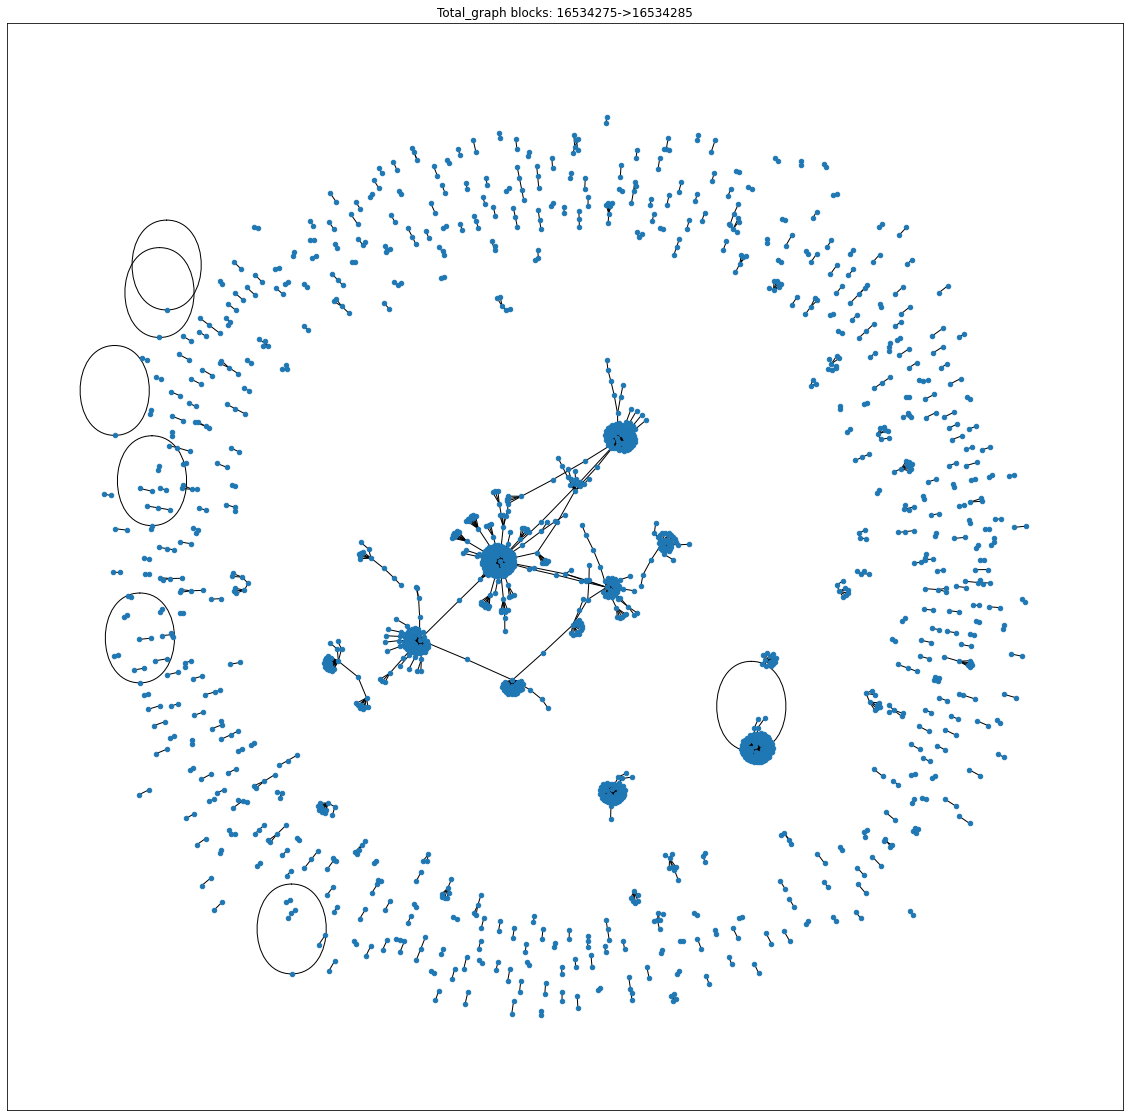

In [36]:
fig = plt.figure(figsize=(20,20))

plt.title(f"Total_graph blocks: {start_block - blocks_in_basic_graph}->{start_block}")
pos = nx.spring_layout(G, scale=10)
nx.draw_networkx(G, pos=pos, node_size=20, with_labels=False)
fig.savefig(f'../assets/graph_{start_block - blocks_in_basic_graph}:{start_block}.png')